<a href="https://colab.research.google.com/github/darapanenichandana/my-app/blob/main/data%20anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 Rows of the Dataset:
              artist                    song  duration_ms  explicit  year  \
0  0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1  1       blink-182    All The Small Things       167066     False  1999   
2  2      Faith Hill                 Breathe       250546     False  1999   
3  3        Bon Jovi            It's My Life       224493     False  2000   
4  4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo        

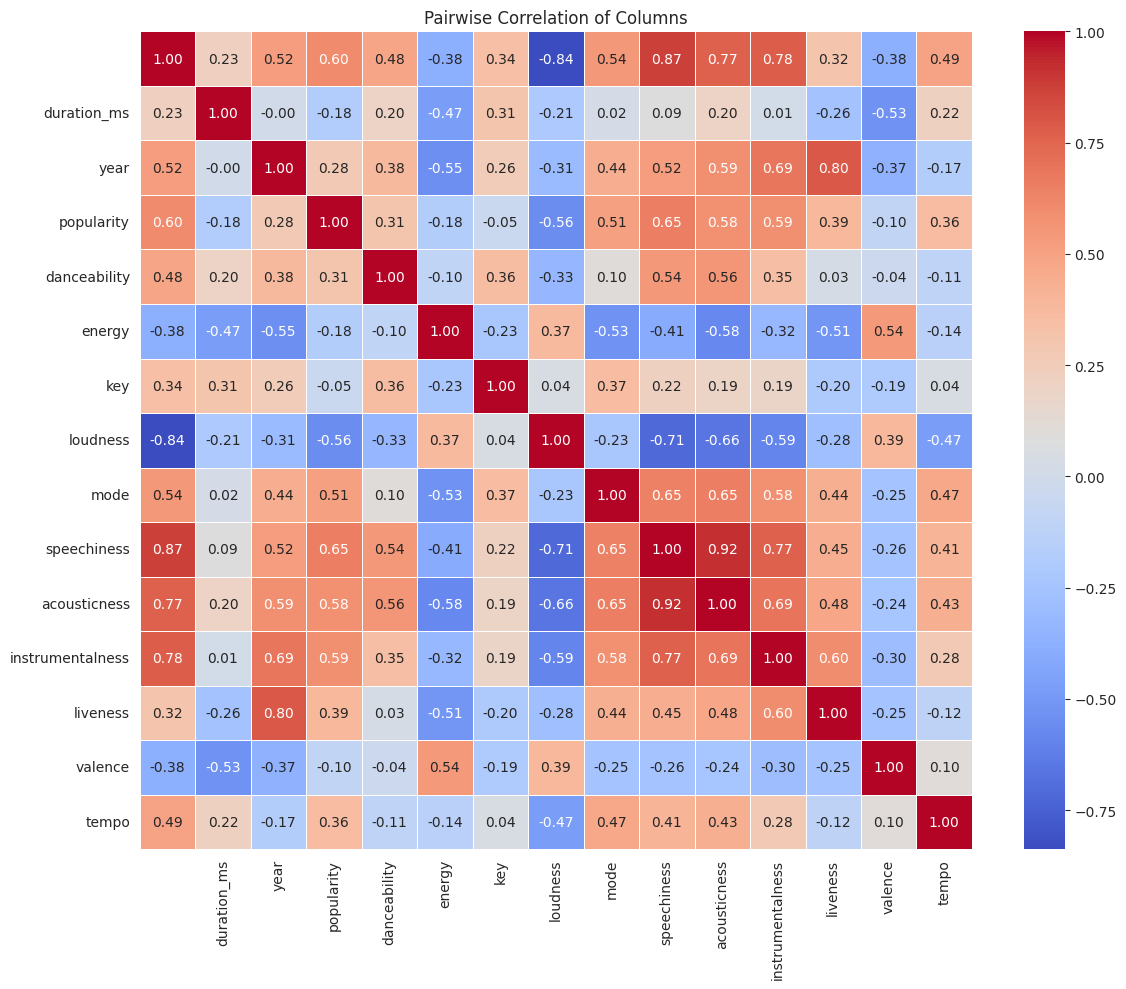

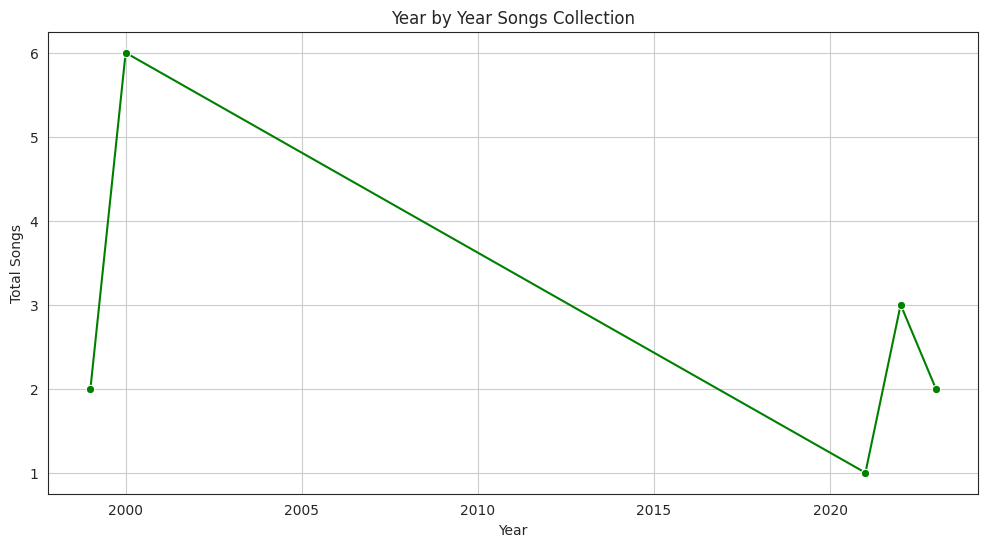

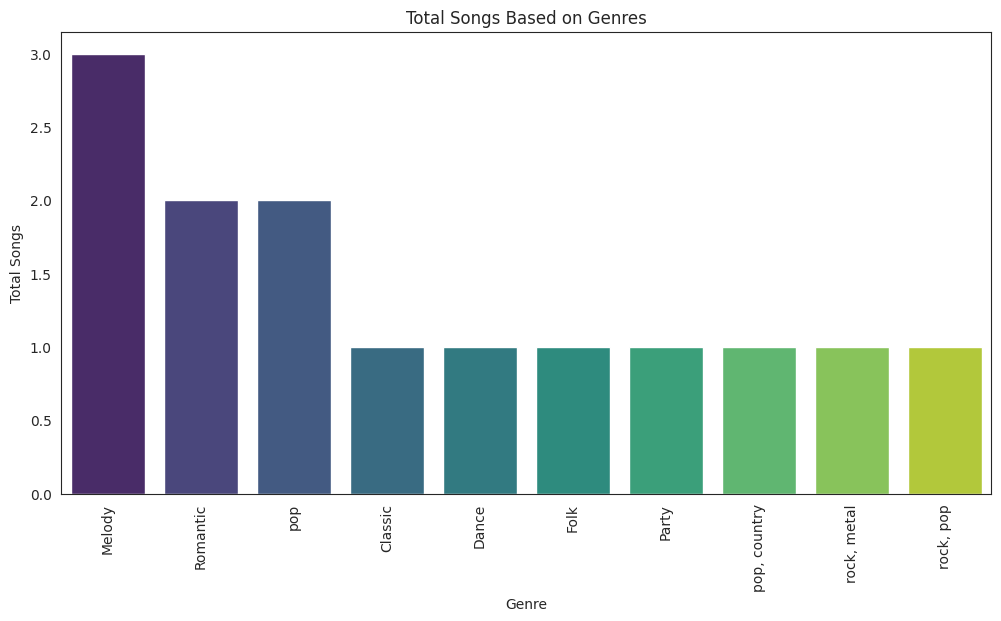

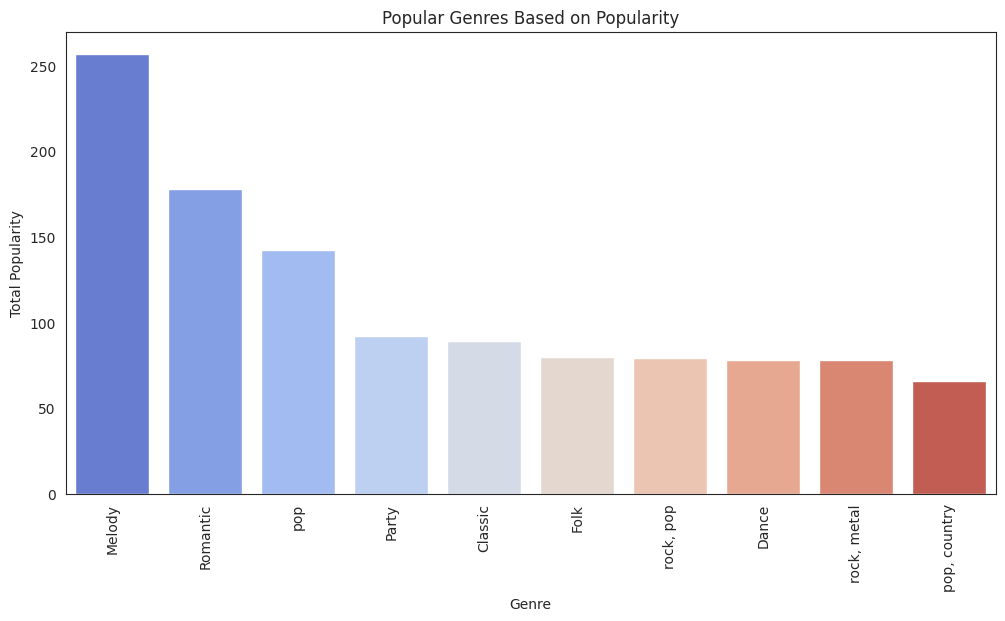

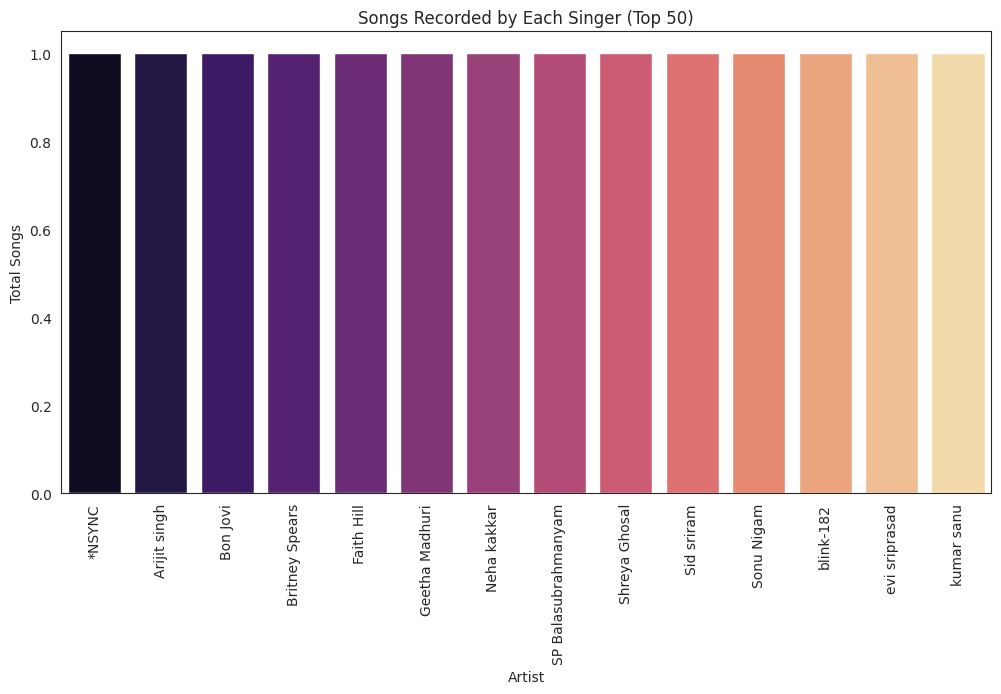

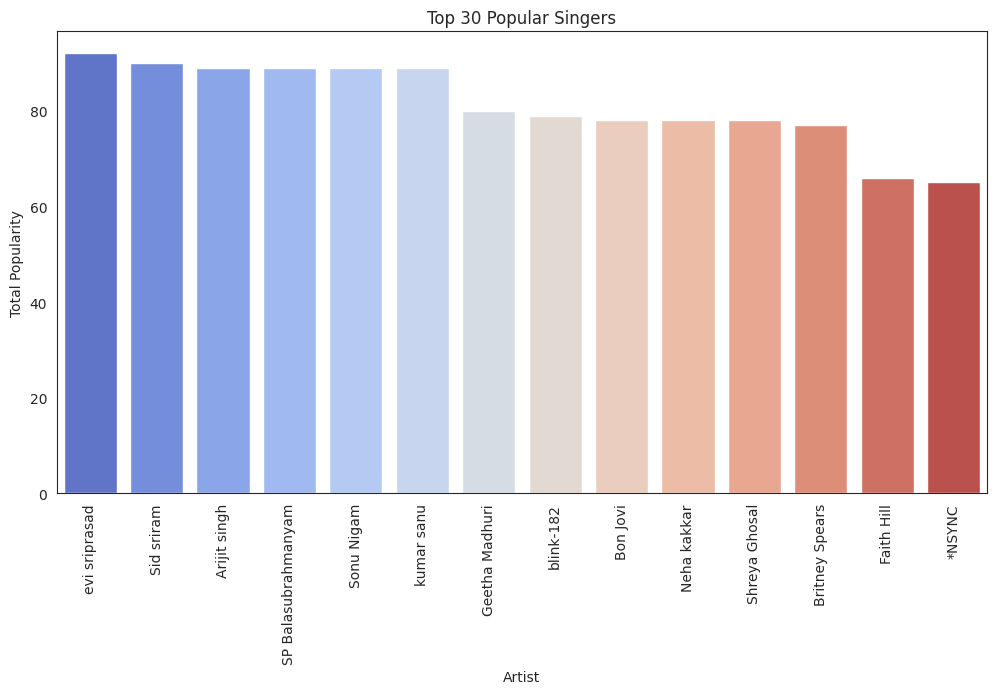

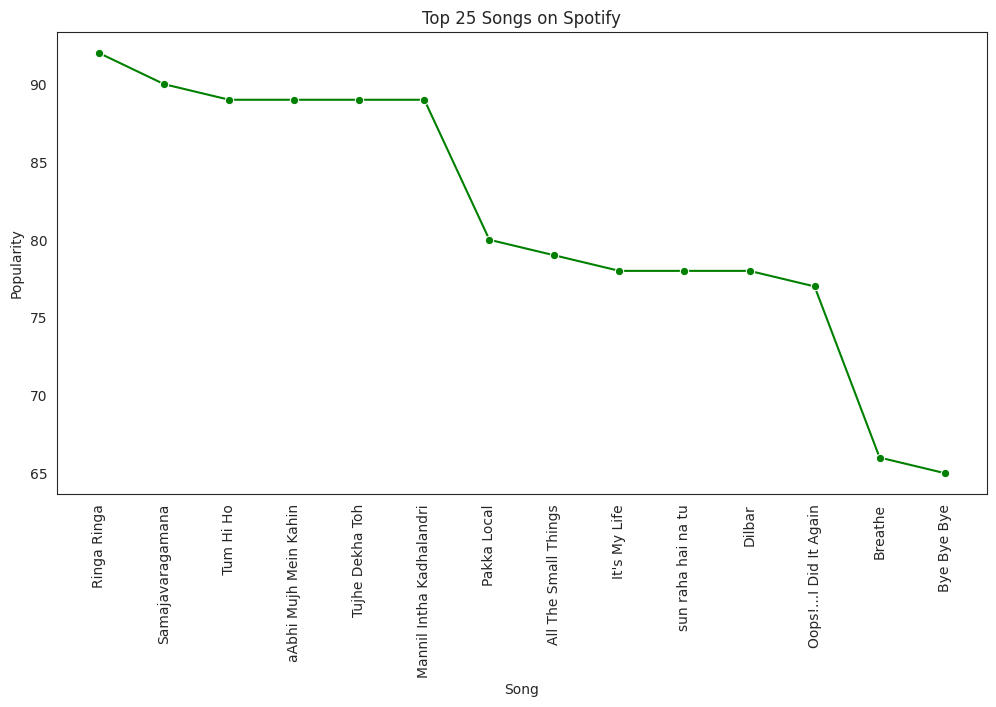

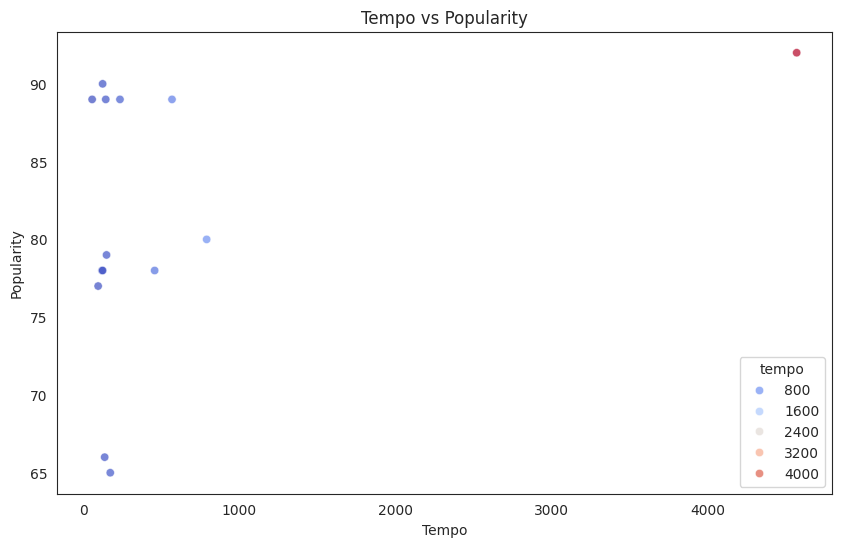

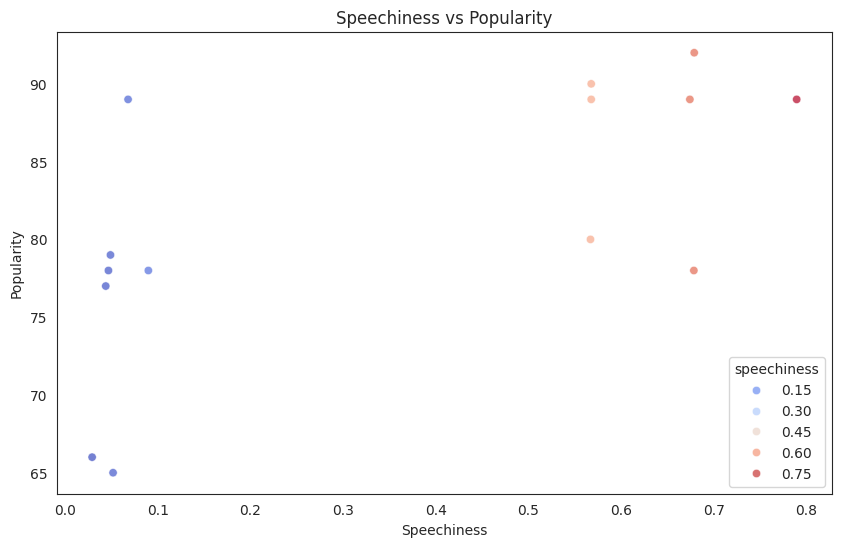

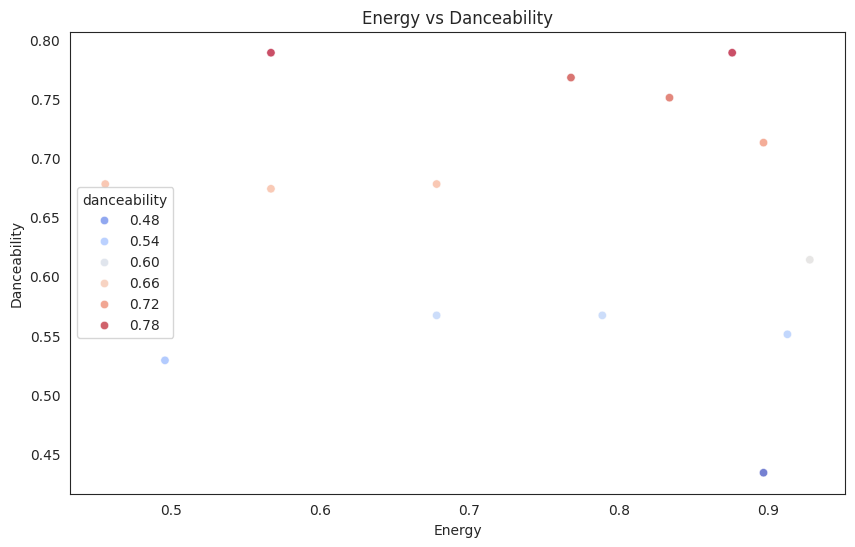

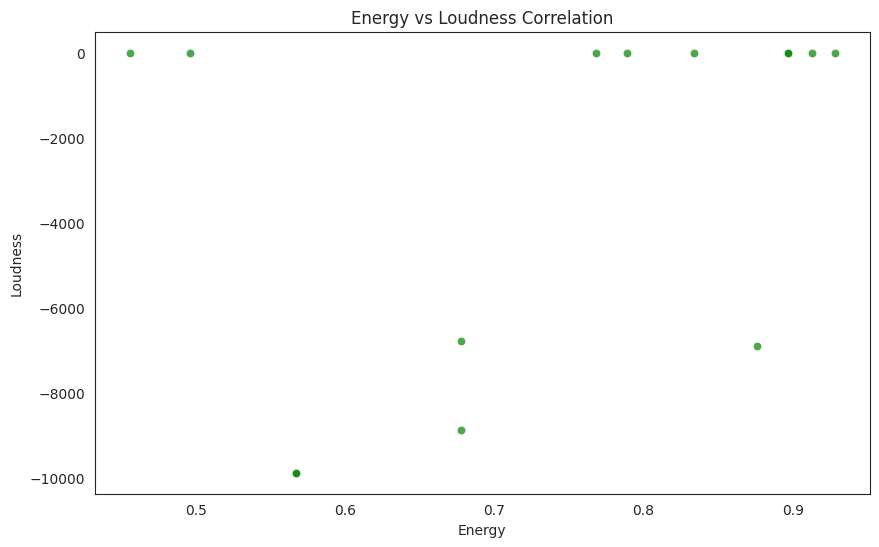

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import time
from google.colab import files

warnings.filterwarnings('ignore')


file_path = '/content/singersontable.csv'
df = pd.read_csv(file_path)


print("First 5 Rows of the Dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values in Each Column:")
print(df.isnull().sum())

print("\nDuplicate Values Count:")
print(df.duplicated().sum())


df.drop_duplicates(inplace=True)

print("\nDataset Shape After Removing Duplicates:", df.shape)

print("\nSummary Statistics:")
print(df.describe())

df.fillna(0, inplace=True)


plt.figure(figsize=(12, 10))
sns.set_style("white")
numeric_df = df.select_dtypes(include=['number'])
if not numeric_df.empty:
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Pairwise Correlation of Columns')
    plt.tight_layout()
    plt.savefig("correlation_heatmap.png", facecolor='white')
    plt.show()

fig = make_subplots(rows=3, cols=3, subplot_titles=(
    '<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness',
    '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=df['popularity'], name='popularity'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['danceability'], name='danceability'), row=1, col=2)
fig.add_trace(go.Histogram(x=df['energy'], name='energy'), row=1, col=3)
fig.add_trace(go.Histogram(x=df['loudness'], name='loudness'), row=2, col=1)
fig.add_trace(go.Histogram(x=df['speechiness'], name='speechiness'), row=2, col=2)
fig.add_trace(go.Histogram(x=df['acousticness'], name='acousticness'), row=2, col=3)
fig.add_trace(go.Histogram(x=df['liveness'], name='liveness'), row=3, col=1)
fig.add_trace(go.Histogram(x=df['valence'], name='valence'), row=3, col=2)
fig.add_trace(go.Histogram(x=df['tempo'], name='tempo'), row=3, col=3)
fig.update_layout(height=900, width=900, title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_white', title_x=0.5)
fig.show()


if 'year' in df.columns and 'song' in df.columns:
    plt.figure(figsize=(12, 6))
    yearly_songs = df.groupby('year')['song'].count().reset_index()
    sns.lineplot(x=yearly_songs['year'], y=yearly_songs['song'], marker='o', color='green')
    plt.title('Year by Year Songs Collection')
    plt.xlabel('Year')
    plt.ylabel('Total Songs')
    plt.grid(True)
    plt.savefig("yearly_songs.png")
    plt.show()
    fig.update_layout(template='plotly_white', title_x=0.5)

if 'genre' in df.columns and 'song' in df.columns:
    plt.figure(figsize=(12, 6))
    genre_songs = df.groupby('genre')['song'].count().reset_index().sort_values(by='song', ascending=False)
    sns.barplot(x=genre_songs['genre'], y=genre_songs['song'], palette='viridis')
    plt.title('Total Songs Based on Genres')
    plt.xlabel('Genre')
    plt.ylabel('Total Songs')
    plt.xticks(rotation=90)
    plt.savefig("genre_songs.png")
    plt.show()


if 'genre' in df.columns and 'popularity' in df.columns:
    plt.figure(figsize=(12, 6))
    genre_popularity = df.groupby('genre')['popularity'].sum().reset_index().sort_values(by='popularity', ascending=False)
    sns.barplot(x=genre_popularity['genre'], y=genre_popularity['popularity'], palette='coolwarm')
    plt.title('Popular Genres Based on Popularity')
    plt.xlabel('Genre')
    plt.ylabel('Total Popularity')
    plt.xticks(rotation=90)
    plt.savefig("popular_genres.png")
    plt.show()


if 'artist' in df.columns and 'song' in df.columns:
    plt.figure(figsize=(12, 6))
    artist_songs = df.groupby('artist')['song'].count().reset_index().sort_values(by='song', ascending=False).head(50)
    sns.barplot(x=artist_songs['artist'], y=artist_songs['song'], palette='magma')
    plt.title('Songs Recorded by Each Singer (Top 50)')
    plt.xlabel('Artist')
    plt.ylabel('Total Songs')
    plt.xticks(rotation=90)
    plt.savefig("songs_by_singer.png")
    plt.show()


if 'artist' in df.columns and 'popularity' in df.columns:
    plt.figure(figsize=(12, 6))
    top_singers = df.groupby('artist')['popularity'].sum().reset_index().sort_values(by='popularity', ascending=False).head(30)
    sns.barplot(x=top_singers['artist'], y=top_singers['popularity'], palette='coolwarm')
    plt.title('Top 30 Popular Singers')
    plt.xlabel('Artist')
    plt.ylabel('Total Popularity')
    plt.xticks(rotation=90)
    plt.savefig("top_singers.png")
    plt.show()


if 'song' in df.columns and 'popularity' in df.columns:
    plt.figure(figsize=(12, 6))
    top_songs = df.sort_values(by='popularity', ascending=False).head(25)

    x_values = range(len(top_songs))
    sns.lineplot(x=x_values, y=top_songs['popularity'], marker='o', color='green')

    plt.xticks(ticks=x_values, labels=top_songs['song'], rotation=90)
    plt.title('Top 25 Songs on Spotify')
    plt.xlabel('Song')
    plt.ylabel('Popularity')
    plt.savefig("top_songs.png")
    plt.show()

fig = px.treemap(df, path=[px.Constant('Singer'),'artist','genre','song'], values='popularity', title='<b>TreeMap of Singers Playlist')
fig.update_traces(root_color='lightgreen')
fig.update_layout(template='plotly_white', title_x=0.5)
fig.show()


fig = px.pie(df.groupby('explicit', as_index=False).count().sort_values(by='song', ascending=False),
             names='explicit', values='song', labels={'song': 'Total songs'},
             hole=.6, color_discrete_sequence=['green', 'crimson'],
             template='plotly_white', title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)
fig.show()

fig = px.area(df[df['explicit']==True].groupby('year', as_index=False).count().sort_values(by='song', ascending=False).sort_values(by='year'),
              x='year', y='song', labels={'song':'Total songs'}, markers=True,
              color_discrete_sequence=['red'], template='plotly_white', title='<b>Yearwise explicit content songs')
fig.update_layout(hovermode='x')
fig.show()

fig = px.box(df, x='explicit', y='popularity', color='explicit', template='plotly_white',
             color_discrete_sequence=['cyan', 'magenta'], title='<b>Popularity based on explicit content')
fig.show()




if 'tempo' in df.columns and 'popularity' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['tempo'], y=df['popularity'], hue=df['tempo'], palette='coolwarm', alpha=0.7)
    plt.title('Tempo vs Popularity')
    plt.xlabel('Tempo')
    plt.ylabel('Popularity')
    plt.savefig("tempo_vs_popularity.png")
    plt.show()

if 'speechiness' in df.columns and 'popularity' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['speechiness'], y=df['popularity'], hue=df['speechiness'], palette='coolwarm', alpha=0.7)
    plt.title('Speechiness vs Popularity')
    plt.xlabel('Speechiness')
    plt.ylabel('Popularity')
    plt.savefig("speechiness_vs_popularity.png")
    plt.show()


if 'energy' in df.columns and 'danceability' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['energy'], y=df['danceability'], hue=df['danceability'], palette='coolwarm', alpha=0.7)
    plt.title('Energy vs Danceability')
    plt.xlabel('Energy')
    plt.ylabel('Danceability')
    plt.savefig("energy_vs_danceability.png")
    plt.show()


if 'energy' in df.columns and 'loudness' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['energy'], y=df['loudness'], color='green', alpha=0.7)
    plt.title('Energy vs Loudness Correlation')
    plt.xlabel('Energy')
    plt.ylabel('Loudness')
    plt.savefig("energy_vs_loudness.png")
    plt.show()

image_files = [
    "correlation_heatmap.png", "yearly_songs.png", "genre_songs.png",
    "popular_genres.png", "songs_by_singer.png", "top_singers.png",
    "top_songs.png", "tempo_vs_popularity.png", "speechiness_vs_popularity.png",
    "energy_vs_danceability.png", "energy_vs_loudness.png"
]

for file in image_files:
    time.sleep(1)
    files.download(file)
